# Principal Component Analysis & Logistic Regression

## Voke Harrison Edafejimue
## Learner ID - 143304

In [ ]:
## Dataset from SKLearn on Breast Cancer data showing the properties of the cancerous cells to determine if it is malignant or benign.

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Load the Data set
Loading the cancer dataset available from sklearn.datasets

In [2]:
from sklearn.datasets import load_breast_cancer

#load the data dictionary
cancer = load_breast_cancer()

# View the dictionary keys
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print (cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
li_classes = [cancer.target_names[1], cancer.target_names[0]]
print("There are 2 target classes:")
print("li_classes", li_classes)

There are 2 target classes:
li_classes ['benign', 'malignant']


In [5]:
# Create a Data Frame.
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

display(df)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

# Normalization

### First, we need to rescale our data so that each feature has a single unit variance using Standard Scaler (using Standard Normal Distribution, where our Mean = 0 and standard deviation = 1), as the values may be in different units. This process is referred to as Z-score Normalization

In [6]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

#initialize an instance of the standard Scaler Class
scaler = StandardScaler()

# Normalize or Rescale the values in our dataframe
# fit the scaler to the data and transform the data.
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data.shape

(569, 30)

## Dimensionality Reduction - Reduction of the Dataset into 2 PCA components

### It is difficult to visualize high-dimensional data, we can use the PCA to find the first 2 principal components and visualize the data in the new 2-dimensional space, with a single scatter plot.

In [8]:
from sklearn.decomposition import PCA

# Transform the data to its first 2 Principal components.
# Fit and Transform
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#View the shape of the 2-dimensional dataset.
x_pca.shape

(569, 2)

## PCA Visualization using a Scatter Plot.

Text(0, 0.5, 'Second Principal Component')

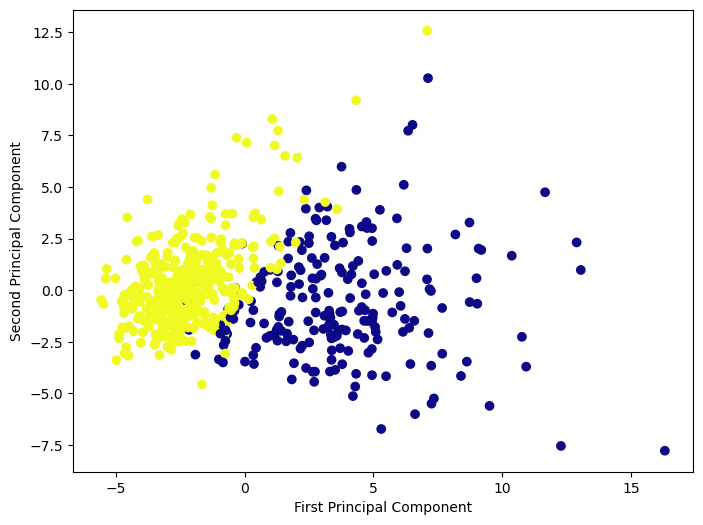

In [9]:
# Import the required libraries 2
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Interpreting the Components
### The colors show the 2 output classes of the original dataset- benign and malignant. It is clear that principal components show clear separation between two output classes. 


## PCA Visualization using a Heat Map.

<Axes: >

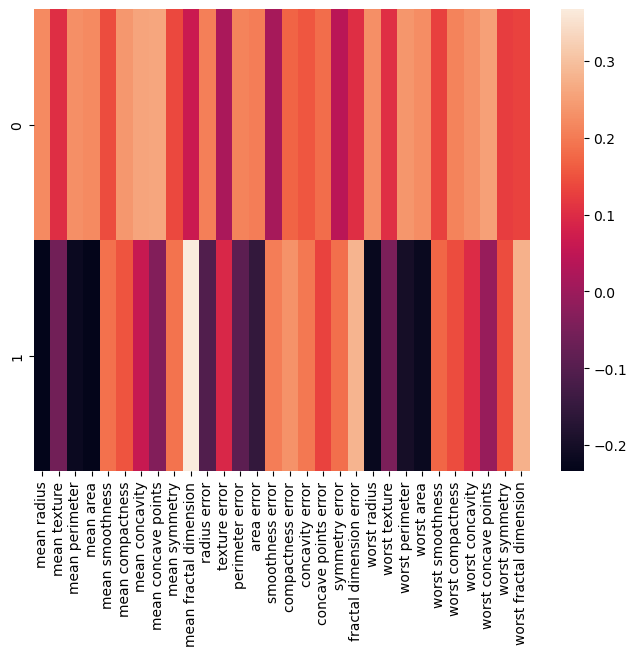

In [10]:
# Our Dataset is currently in a Numpy Array
pca.components_
#Convert the array back to a dataframe
comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

# Lets plot a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(comp)

### Interpretation of the Heat Map 
### The darker portions of the heat map have a lower correlation to the components and the lighter portions have a higher correlation to the components.
### Note the high correlation values between features which are directly related to each other e.g. mean radius, mean perimeter, and mean area.

## Implement Logistics Regression for Prediction.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
df['result'] = cancer['target']
X = df.values
y = df['result'].values

# Define Training and Testing Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# each function takes two 1-dimensional numpy arrays: the true values and the predicted values of the target
print(f"accuracy: {accuracy_score(y_test, y_pred) :.2f}")
print(f"precision: {precision_score(y_test, y_pred) :.2f}")
print(f"recall: {recall_score(y_test, y_pred) :.2f}")
print(f"f1_score: {f1_score(y_test, y_pred):.2f}")

# using scikit-learn we are able to get the four values in the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

accuracy: 0.95
precision: 0.95
recall: 0.98
f1_score: 0.96
[[ 93  10]
 [  3 179]]


### All of the metric calculations show good scores which means that our Logistic Regression model is good

Text(0.5, 1.0, 'Scatter plot of Logistic Regression')

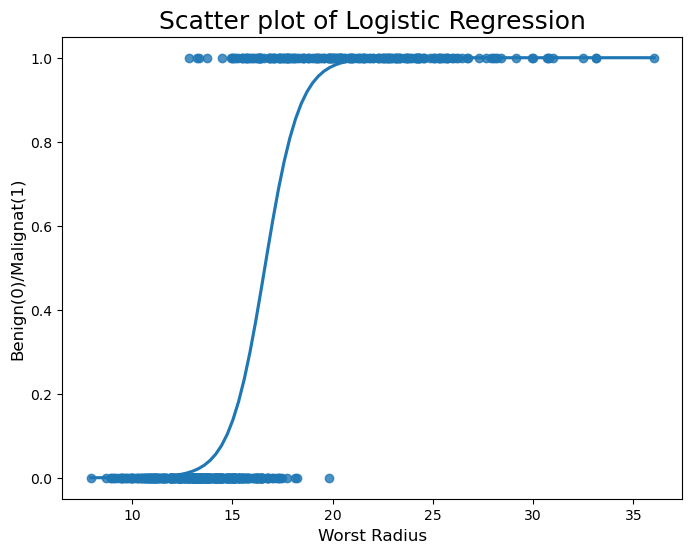

In [18]:
# Visualize the data

# Note that we need to reverse the original '0' and '1' mapping in order to end up with this mapping:
# Benign = 0 (negative class)
# Malignant = 1 (positive class)
y = [1 if x==0 else 0 for x in list(cancer.target)]
x = df.values



# Create a Regression plot

# Set figure size (width, height) in inches 
fig, ax = plt.subplots(figsize = ( 8 , 6 )) 

sns.regplot(x=x[:,20], y=y, data=df, logistic=True, ci=None)

# Set label for x-axis 
ax.set_xlabel( "Worst Radius" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Benign(0)/Malignat(1)" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Scatter plot of Logistic Regression" , size = 18 ) 
  


## Interpretation of Regression Plot.
### The 'worst radius' feature shown above has a high Pearson correlation with the target and therefore we see good separation of the points that correspond to the negative class (at the bottom, where TARGET=0) vs the points that correspond to the positive class (at the top, where TARGET=1).¶

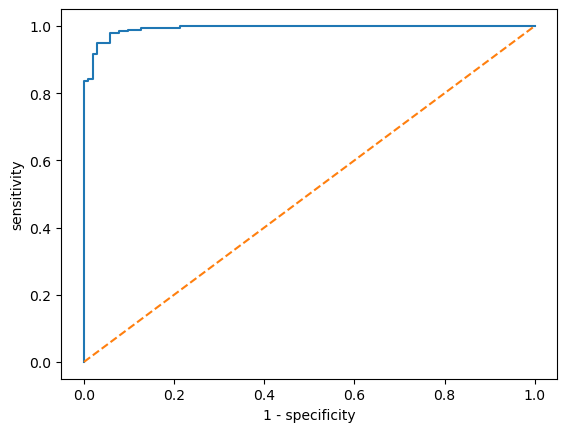

In [19]:
# Plot a ROC (Reciever Operating Characteristic Curve) graph to show the performance model of the different classification thresholds

y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlim(0.0, 1.0)
# plt.ylim(0.0, 1.0)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

plt.show()

## Interpretation of the Reciever Operating Characteristic Curve(ROC)
### The ROC curve is a graph of the specificity vs sensitivity i.e specificity is the % actual negatives correctly predicted and sensitivity being the % actual positives correctly predicted.